# **RED NEURONAL CELSIUS - FAHRENHEIT**

# **1. Instalación de las bibliotecas necesarias**
---

In [ ]:
#-----------------------------------------------------------------------------------------------------
# 1.  Instalación de las bibliotecas necesarias
#-----------------------------------------------------------------------------------------------------
import tensorflow as tf
import numpy as np
import random
import matplotlib.pyplot as plt

from keras.layers import Dense



# **2. Preparación de los datos**
---

In [ ]:
#------------------------------------------------------------------------
# 2. Preparación de los datos
#------------------------------------------------------------------------
# 2.1. Creación de dos funciones
#-------------------------------------------------------------------------------
def celsiusFahrenheit(celsius):
    fahrenheit = ((celsius * 1.8) + 32)
    return fahrenheit

def FahrenheitError(fahrenheit):
    fahrenheit = fahrenheit * (1 + (random.random() - random.random()) * 0.25)
    return fahrenheit

#-------------------------------------------------------------------------------
# 2.2. Generación de dos tablas: una para grados Celsius y otra para Fahrenheit
#      La lista Celsius es la de entrada de datos y la Fahrenheit la de salida
#-------------------------------------------------------------------------------
CELSIUS = np.random.randint(-50, 50, size=random.randint(10, 100))
#FAHRENHEIT = celsiusFahrenheit( CELSIUS )
FAHRENHEIT = FahrenheitError(celsiusFahrenheit(CELSIUS))

# **3. Elección del modelo**
---

In [3]:
#------------------------------------------------------------------------
# 3. Elección del modelo
#------------------------------------------------------------------------
modelo = tf.keras.Sequential()

# **4. Configuración de los parámetros del modelo**
---

In [4]:
#------------------------------------------------------------------------
# 4. Configuración de los parámetros del modelo:
#------------------------------------------------------------------------
#     El modelo elegido es el más sencillo: Perceptron
#       salida = peso  * X  + bias
#       salida = peso1 * X1 + peso2 * X2 + bias
#-------------------------------------------------------------------------------
modelo = tf.keras.Sequential()
modelo.add( Dense( units = 1, input_shape = [ 1 ] ) )   # Capa de entrada con 1 neurona


c:\Users\Mario\FP\.conda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# **5. Compilación del modelo:** compile( optimizer, loss, metrics )
---

In [5]:
#------------------------------------------------------------------------
# 5. Compilación del modelo
#------------------------------------------------------------------------
#     optimizer: algoritmo de optimización con el que se entrenará el modelo.
#     loss: función de pérdida que se minimizará durante el entrenamiento
#     metrics: métricas que monitorean el entrenamiento y la evaluación del modelo
#             - accuracy  métrica de clasificación que mide la fracción de muestras correctamente clasificadas
#             - loss      medida de cuánto difieren las predicciones de los valores reales.
#-------------------------------------------------------------------------------
modelo.compile(
    optimizer=tf.keras.optimizers.Adam(0.1),    # Tasa de aprendizaje
    loss='mean_squared_error',                  # Función de pérdida para regresión
    metrics=['mean_squared_error']              # Métrica para evaluar durante el entrenamiento
)


# **6. Entrenamiento del modelo**
---

In [ ]:
#------------------------------------------------------------------------
# 6. Entrenamiento del modelo
#------------------------------------------------------------------------
#     Se utiliza la función fit sobre el modelo, especificando:
#       - Datos de entrada: 'celsius'
#       - Datos de salida esperados: 'fahrenheit'
#       - Número de interaciones: 'epochs'
#       - Si muestra evolución por pantalla: 'verbose'
#-------------------------------------------------------------------------------
print("Comenzamos el entrenamiento ...")
ACIERTOS = 0.75   # 75% de aciertos
INTENTOS = 0

while True:
    historial = modelo.fit(CELSIUS,
                           FAHRENHEIT,
                           epochs=50,
                           verbose=False)
    INTENTOS = INTENTOS + 1
    # Obtener la precisión del último registro en el historial de entrenamiento
    perdida = historial.history['loss'][-1]
    #precision = historial.history['accuracy'][0]

    print(f"Iteración {INTENTOS} - Pérdida: {perdida}")

    if perdida < 0.01:  # Criterio de parada
        break


print("Modelo ya entrenado ...." )

print( f"Totalidad de elementos {len(CELSIUS)}" )


Comenzamos el entrenamiento ...
Iteración 1 - Pérdida: 449.3211975097656
Iteración 2 - Pérdida: 126.78400421142578
Iteración 3 - Pérdida: 25.982349395751953
Iteración 4 - Pérdida: 3.753626823425293
Iteración 5 - Pérdida: 0.3702174127101898
Iteración 6 - Pérdida: 0.024746423587203026
Iteración 7 - Pérdida: 0.0011104689911007881
Modelo ya entrenado ...
Totalidad de elementos 88


# **7. Evaluación del modelo**
---

In [7]:
#------------------------------------------------------------------------
# 7. Evaluación del modelo
#------------------------------------------------------------------------
evaluacion = modelo.evaluate( CELSIUS, FAHRENHEIT, verbose = 0 )
print( "Resultados de la evaluación:" )
print( "----------------------------" )
print( f"Pérdida: {evaluacion[ 0 ]   * 100:.2f}%" )
print( f"Precisión: {evaluacion[ 1 ] * 100:.2f}%" )

Resultados de la evaluación:
----------------------------
Pérdida: 0.11%
Precisión: 0.11%


# **8. Predicción o inferencia del modelo**
---

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


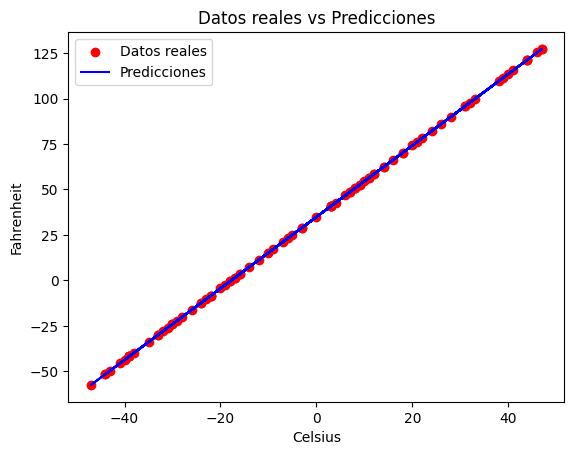

In [8]:
#------------------------------------------------------------------------
# 8. Predicción o inferencia
#------------------------------------------------------------------------
# Generar predicciones
predicciones = modelo.predict( CELSIUS )

# Gráfico de dispersión de datos reales
plt.scatter( CELSIUS, FAHRENHEIT, color='red', label = 'Datos reales')

# Línea de predicción
plt.plot( CELSIUS, predicciones, color='blue', label='Predicciones')

# Etiquetas y título
plt.xlabel( 'Celsius' )
plt.ylabel( 'Fahrenheit' )
plt.title(  'Datos reales vs Predicciones' )

# Leyenda
plt.legend()

In [ ]:
#-----------------------------------------------------------------------------------------------------
# 1.  Instalación de las bibliotecas necesarias
#-----------------------------------------------------------------------------------------------------
import tensorflow as tf
import numpy as np
import random
import matplotlib.pyplot as plt

from keras.layers import Dense

#------------------------------------------------------------------------
# 2. Preparación de los datos
#------------------------------------------------------------------------
# 2.1. Creación de dos funciones
#-------------------------------------------------------------------------------
def celsiusFahrenheit(celsius):
    fahrenheit = ((celsius * 1.8) + 32)
    return fahrenheit

def FahrenheitError(fahrenheit):
    fahrenheit = fahrenheit * (1 + ( random.random() - random.random() ) * 0.25 )
    return fahrenheit

#-------------------------------------------------------------------------------
# 2.2. Generación de dos tablas: una para grados Celsius y otra para Fahrenheit
#      La lista Celsius es la de entrada de datos y la Fahrenheit la de salida
#-------------------------------------------------------------------------------
CELSIUS = np.random.randint( -150, 150, size = random.randint( 20, 1000 ) )
#FAHRENHEIT = celsiusFahrenheit( CELSIUS )
FAHRENHEIT = FahrenheitError( celsiusFahrenheit( CELSIUS ) )

#------------------------------------------------------------------------
# 3. Elección del modelo
#------------------------------------------------------------------------
modelo = tf.keras.Sequential()

#------------------------------------------------------------------------
# 4. Configuración de los parámetros del modelo:
#------------------------------------------------------------------------
#     El modelo elegido es el más sencillo: Perceptron
#       salida = peso  * X  + bias
#       salida = peso1 * X1 + peso2 * X2 + bias
#-------------------------------------------------------------------------------

#modelo.add( Dense( units = 1, input_shape = [ 1 ] ) )   # Capa de entrada con 1 neurona

# Primera capa oculta (entrada con una neurona)
modelo.add(Dense(units=10, input_shape=[1], activation='relu'))  

# Segunda capa oculta con 8 neuronas
modelo.add(Dense(units=8, activation='relu'))  

# Tercera capa oculta con 4 neuronas
modelo.add(Dense(units=4, activation='relu'))  

# Capa de salida con 1 neurona (porque queremos una sola predicción)
modelo.add(Dense(units=1))  



#------------------------------------------------------------------------
# 5. Compilación del modelo
#------------------------------------------------------------------------
#     optimizer: algoritmo de optimización con el que se entrenará el modelo.
#     loss: función de pérdida que se minimizará durante el entrenamiento
#     metrics: métricas que monitorean el entrenamiento y la evaluación del modelo
#       - MÉTRICAS DE CLASIFICACIÓN
#             - accuracy  métrica de clasificación que mide la fracción de muestras correctamente clasificadas
#             - precision
#             - recall
#
#       - MÉTRICAS DE REGRESIÓN
#             - loss      medida de cuánto difieren las predicciones de los valores reales.
#-------------------------------------------------------------------------------
modelo.compile(
    optimizer=tf.keras.optimizers.Adam(0.1),    # Tasa de aprendizaje
    loss='mean_squared_error',                  # Función de pérdida para regresión
    metrics=['mean_squared_error']              # Métrica para evaluar durante el entrenamiento
)

#------------------------------------------------------------------------
# 6. Entrenamiento del modelo
#------------------------------------------------------------------------
#     Se utiliza la función fit sobre el modelo, especificando:
#       - Datos de entrada: 'celsius'
#       - Datos de salida esperados: 'fahrenheit'
#       - Número de interaciones: 'epochs'
#       - Si muestra evolución por pantalla: 'verbose'
#-------------------------------------------------------------------------------
print("Comenzamos el entrenamiento ...")
ACIERTOS = 0.90   # 90% de aciertos
INTENTOS = 0

while True:
    historial = modelo.fit( CELSIUS, FAHRENHEIT, epochs = 50, verbose = False )
    INTENTOS = INTENTOS + 1
    perdida = historial.history[ 'loss' ][ -1 ]

    print( f"Iteración {INTENTOS} - Pérdida: {perdida}" )
    if perdida < ( 1 - ACIERTOS )/100:  # Criterio de parada
        break


print("Modelo ya entrenado ..." )

print( f"Totalidad de elementos {len(CELSIUS)}" )

#------------------------------------------------------------------------
# 7. Evaluación del modelo
#------------------------------------------------------------------------
evaluacion = modelo.evaluate( CELSIUS, FAHRENHEIT, verbose = 0 )
print( "\nResultados de la evaluación:" )
print( "----------------------------" )
print( f"Pérdida: {evaluacion[ 0 ]   * 100:.2f}%" )
print( f"Precisión: {evaluacion[ 1 ] * 100:.2f}%" )

#------------------------------------------------------------------------
# 8. Predicción o inferencia
#------------------------------------------------------------------------
# Generar predicciones
predicciones = modelo.predict( CELSIUS, verbose = False )

#------------------------------------------------------------------------
# Predicción gráfica
#------------------------------------------------------------------------
# Gráfico de dispersión de datos reales
plt.scatter( CELSIUS, FAHRENHEIT, color='red', label = 'Datos reales')

# Línea de predicción
plt.plot( CELSIUS, predicciones, color = 'blue', label = 'Predicciones' )

# Etiquetas y título
plt.xlabel( 'Celsius' )
plt.ylabel( 'Fahrenheit' )
plt.title(  'Datos reales vs Predicciones' )

# Leyenda
plt.legend()
plt.show()

#------------------------------------------------------------------------
# Fórmula asociada
#------------------------------------------------------------------------
capa = modelo.layers[0]
print( f"Fahrenheit = Celsius * {capa.get_weights()[0][0][0]:.4f} + {capa.get_weights()[1][0]:.4f}" )


#------------------------------------------------------------------------
# Predicción con un valor
#------------------------------------------------------------------------
print()
print("Hagamos una predicción")

celsiusPrueba = random.randint(-150, 150)
resultado = modelo.predict(np.array([celsiusPrueba]), verbose=False)
print(f"{celsiusPrueba}ºC son {resultado[0][0]:.4f} ºF, frente a los reales {celsiusFahrenheit(celsiusPrueba):.4f} ºF")


Comenzamos el entrenamiento ...
Iteración 1 - Pérdida: 421.702392578125
Iteración 2 - Pérdida: 23.53746795654297
Iteración 3 - Pérdida: 2.073094606399536
Iteración 4 - Pérdida: 1.945850133895874
Iteración 5 - Pérdida: 2.9532876014709473
Iteración 6 - Pérdida: 2.803654432296753
Iteración 7 - Pérdida: 2.350996494293213
Iteración 8 - Pérdida: 2.2196128368377686
Iteración 9 - Pérdida: 3.0958120822906494
Iteración 10 - Pérdida: 7.694978713989258
Iteración 11 - Pérdida: 4.0764265060424805
Iteración 12 - Pérdida: 10.265653610229492
Iteración 13 - Pérdida: 0.34793034195899963
Iteración 14 - Pérdida: 3.6310508251190186
Iteración 15 - Pérdida: 214.51922607421875
Iteración 16 - Pérdida: 25.935068130493164
Iteración 17 - Pérdida: 0.43640032410621643
Iteración 18 - Pérdida: 730.0106201171875
Iteración 19 - Pérdida: 1.539318561553955
Iteración 20 - Pérdida: 11.552545547485352
Iteración 21 - Pérdida: 9.675171852111816
Iteración 22 - Pérdida: 7.758430004119873
Iteración 23 - Pérdida: 3.660778045654297